# Introduction to RDKit

In [16]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

## Reading molecules

### Valid molecules are objects

In [17]:
mol = Chem.MolFromMolFile('mol.sdf')

In [18]:
mol

### Invalid molecules are None

In [19]:
test_mol = Chem.MolFromMolFile('invalid_mol.sdf')

[11:29:52] Atom line too short: '  1  2  1  0' on line 10


In [20]:
test_mol

In [21]:
test_mol == None, mol == None

(True, False)

# Attributes

In [22]:
mol.GetNumAtoms()

9

In [24]:
for atom in mol.GetAtoms():
    print(atom.GetIdx())
    print(atom.GetAtomicNum())
    print(atom.GetFormalCharge())
    print(atom.GetMass())
    print(atom.GetDegree())
    print()

0
6
0
12.011
1

1
6
0
12.011
3

2
6
0
12.011
2

3
6
0
12.011
2

4
6
0
12.011
2

5
7
0
14.007
2

6
6
0
12.011
2

7
6
0
12.011
3

8
8
0
15.999
1



In [25]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.InstallIPythonRenderer()

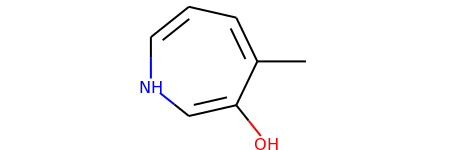

In [26]:
mol

In [27]:


def add_atom_index(molecule):
    
    m = Chem.Mol(molecule)
    
    n_atoms = m.GetNumAtoms()
    for atom in m.GetAtoms():
        atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
    return m

In [28]:
mm = add_atom_index(mol)

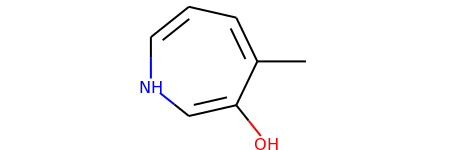

In [29]:
mol

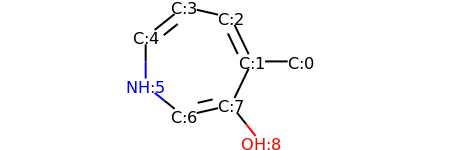

In [30]:
mm

# SMILES

In [31]:
Chem.MolToSmiles(mol)

'CC1=CC=CNC=C1O'

### For example, which molecules do these SMILES represent?

In [32]:
smiles_1 = 'C1CCCCC1'

smiles_2 = 'O1CCOCC1'

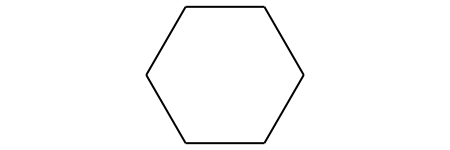

In [33]:
Chem.MolFromSmiles(smiles_1)

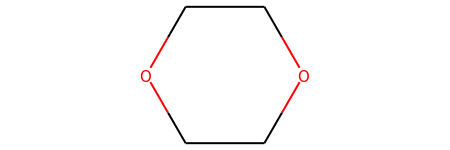

In [34]:
Chem.MolFromSmiles(smiles_2)

### And this one?

In [35]:
smiles_3 = 'C1CCCC2CCCCC12'

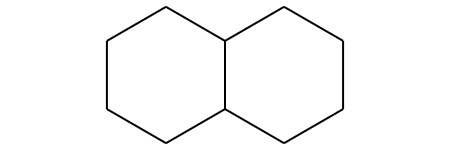

In [36]:
Chem.MolFromSmiles(smiles_3)

### Aromatic bonds can be included with lower case letters

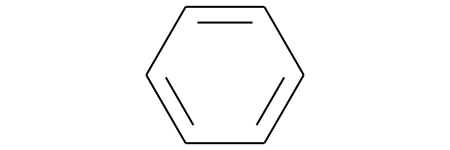

In [41]:
Chem.MolFromSmiles('c1ccccc1')

### Steroechemistry

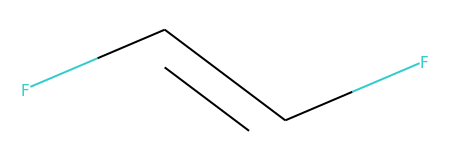

In [37]:
Chem.MolFromSmiles('F/C=C/F')

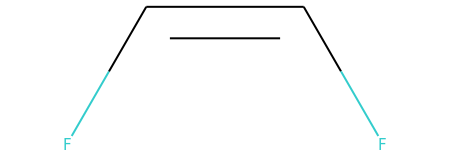

In [38]:
Chem.MolFromSmiles('F/C=C\F')

### Non-bonded compunds

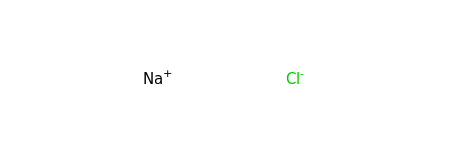

In [39]:
Chem.MolFromSmiles('[Na+].[Cl-]')

# Fingerprints

In [ ]:
IPythonConsole.UninstallIPythonRenderer()

In [ ]:
mol

### Morgan fingerprints

In [ ]:
morgan_fps = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=1024)

In [ ]:
morgan_fps.ToBitString()

In [ ]:
list(morgan_fps)

In [ ]:
import numpy as np

In [ ]:
np.array(morgan_fps)

# A partir de los FPs, se puede cuantificar qué tan parecidas son dos moléculas.

In [ ]:
IPythonConsole.InstallIPythonRenderer()

mol1 = Chem.MolFromSmiles('c1ccccn1')
mol2 = Chem.MolFromSmiles('c1ccco1')

In [ ]:
mol1

In [ ]:
mol2

In [ ]:
IPythonConsole.UninstallIPythonRenderer()

bit1 = {}
bit2 = {}

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1,radius=3, nBits=2048, bitInfo=bit1)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius=3, nBits=2048, bitInfo=bit2)

# Tanimoto

!['AB'](sets_AB.png)

$$\Large
  T(A,B) = \frac{|A \cap B|}{|A \cup B|}
$$

obs:
$$\Large
  0 \leq T(A,B) \leq 1
$$

### Para el caso de los fingerprints, dadas dos moléculas $M_A$ y $M_B$, el conjunto A representa los bits distintos de cero de la molécula A, y el conjunto B representa los bits distintos de cero de la molécula B.

In [ ]:
def tanimoto(fpA,fpB):
    
    num = np.dot(fpA,fpB)
    den = np.sum(fpA)+ np.sum(fpB) - num
    
    tanimoto_index = num/den
    
    return tanimoto_index

In [ ]:
tanimoto(fp1,fp1), tanimoto(fp2,fp2)

In [ ]:
tanimoto(fp1,fp2)

In [ ]:
from rdkit import DataStructs

In [ ]:
DataStructs.TanimotoSimilarity(fp1,fp2)

In [ ]:
%%timeit
tanimoto(fp1,fp2)

In [ ]:
%%timeit
DataStructs.TanimotoSimilarity(fp1,fp2)

In [ ]:
bit1

In [ ]:
IPythonConsole.InstallIPythonRenderer()

In [ ]:
mol1

The default highlight colors for the Morgan bits indicate:

        blue: the central atom in the environment

        yellow: aromatic atoms

        gray: aliphatic ring atoms

The default highlight colors for the RDKit bits indicate:

        yellow: aromatic atoms

In [ ]:
Chem.Draw.DrawMorganBit(mol1,378, bit1)

In [ ]:
Chem.Draw.DrawMorganBit(mol1,383, bit1)

In [ ]:
# all at once

In [ ]:
mol1

In [ ]:
add_atom_index(mol1)

In [ ]:
bit1

In [ ]:
tpls = [(mol1,bit,bit1) for bit in fp1.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=2,legends=[str(x) for x in fp1.GetOnBits()])

In [ ]:
add_atom_index(mol2)

In [ ]:
tpls = [(mol2,bit,bit2) for bit in fp2.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=5,legends=[str(x) for x in fp2.GetOnBits()])

In [ ]:
help(Draw.DrawMorganBits)

In [ ]:
rdkit.Chem.Draw.IPythonConsole.Draw()